In [1]:
import pandas as pd
from os import listdir
from os.path import isfile, join
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import fnmatch
import os

In [2]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 800

# Vertex population vs magnetic field during an hysteresis loop

Reading and indexing data

In [3]:
change_m_time = 300

In [4]:
Bi_imput = "/home/carolina/DataFrames_Summer_2020"

In [5]:
Bi = []
for file in os.listdir(Bi_imput):
    if fnmatch.fnmatch(file, '*'+str(change_m_time)+'_exp*.dat'):
        print(file)
        Bi.append(pd.read_csv(join(Bi_imput,file), sep = "\t", index_col = [0,1])) 
        
keys_Bi = []
for i in range(len(Bi)):
    keys_Bi.append(i)

BidisperseColloidalIce_Hysteresis-Loop_until300mT_l22_time300_exp2.dat
BidisperseColloidalIce_Hysteresis-Loop_until300mT_l22_time300_exp3.dat
BidisperseColloidalIce_Hysteresis-Loop_until300mT_l22_time300_exp1.dat
BidisperseColloidalIce_Hysteresis-Loop_until300mT_l22_time300_exp0.dat
BidisperseColloidalIce_Hysteresis-Loop_until300mT_l22_time300_exp4.dat


In [6]:
Bidi = pd.concat(Bi, keys = keys_Bi)

In [7]:
Bidi.index.names = ['Exp', 'frame', 'id']

In [8]:
Bidi

Coordination  Charge       DipoleX  DipoleY  LocationX  \
Exp frame id                                                            
0   0     0               3       1  0.000000e+00      1.0      429.0   
          1               3       3 -1.000000e+00      0.0        0.0   
          2               3       3 -1.110223e-16     -1.0      693.0   
          3               4      -2  2.000000e+00      0.0      693.0   
          4               3       1 -2.000000e+00     -1.0      627.0   
...                     ...     ...           ...      ...        ...   
4   40    478             4       0 -2.000000e+00     -2.0      330.0   
          479             4       0  4.978996e-17      0.0      561.0   
          480             4       2 -2.000000e+00      0.0      594.0   
          481             4       2 -2.000000e+00      0.0      627.0   
          482             4       0  0.000000e+00      0.0      594.0   

               LocationY  
Exp frame id              
0   0     0          0.0  
          1        231.0  
          2          0.0  
          3         33.0  
          4          0.0  
...                  ...  
4   40    478      495.0  
          479       99.0  
          480       66.0  
          481       66.0  
          482       99.0  

[99015 rows x 6 columns]

In [9]:
n_of_vertex_system = 20

In [10]:
B = Bidi.loc[ (Bidi['LocationX']<33+33*n_of_vertex_system) & (Bidi['LocationX']>33)]
b = B.loc[ (B['LocationY']<33+33*n_of_vertex_system) & (B['LocationY']>33)]

In [11]:
infle = change_m_time/15
round(infle)-1

19

In [12]:
inc = b.loc[b.index.get_level_values('frame') < round(infle)-1]
dec = b.loc[b.index.get_level_values('frame') > round(infle)-1]

In [13]:
field_max = 300
slope = field_max/change_m_time
slope

1.0

In [14]:
inc['field'] = (inc.index.get_level_values('frame'))*15*slope 

dec['field'] = field_max-field_max*((dec.index.get_level_values('frame')-dec.index.get_level_values('frame').min())/(dec.index.get_level_values('frame').min())) 

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
dec

Coordination  Charge       DipoleX  DipoleY  LocationX  \
Exp frame id                                                            
0   20    19              4       0  0.000000e+00      0.0      297.0   
          20              4      -2  2.000000e+00      0.0      297.0   
          21              4       0  2.000000e+00      2.0      231.0   
          22              4       2  1.224647e-16      2.0      231.0   
          23              4       0 -2.000000e+00     -2.0      330.0   
...                     ...     ...           ...      ...        ...   
4   40    478             4       0 -2.000000e+00     -2.0      330.0   
          479             4       0  4.978996e-17      0.0      561.0   
          480             4       2 -2.000000e+00      0.0      594.0   
          481             4       2 -2.000000e+00      0.0      627.0   
          482             4       0  0.000000e+00      0.0      594.0   

               LocationY  field  
Exp frame id                     
0   20    19       429.0  300.0  
          20       396.0  300.0  
          21       330.0  300.0  
          22       363.0  300.0  
          23       231.0  300.0  
...                  ...    ...  
4   40    478      495.0    0.0  
          479       99.0    0.0  
          480       66.0    0.0  
          481       66.0    0.0  
          482       99.0    0.0  

[37905 rows x 7 columns]

In [16]:
inc["type"] = np.NaN
inc.loc[inc.Charge==-4, "type"] = "Type 1"
inc.loc[inc.Charge==-2, "type"] = "Type 2"
inc.loc[inc.Charge==+2, "type"] = "Type 5"
inc.loc[inc.Charge==+4, "type"] = "Type 6"

zeroq = inc.Charge==0

dipole_magnitude = np.sqrt(inc[zeroq].DipoleX**2+inc[zeroq].DipoleY**2)

inc.loc[zeroq & (dipole_magnitude<1), "type"] = "Type 3"
inc.loc[zeroq & (dipole_magnitude>2) , "type"] = "Type 4"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/carolina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
dec["type"] = np.NaN
dec.loc[dec.Charge==-4, "type"] = "Type 1"
dec.loc[dec.Charge==-2, "type"] = "Type 2"
dec.loc[dec.Charge==+2, "type"] = "Type 5"
dec.loc[dec.Charge==+4, "type"] = "Type 6"

zeroq = dec.Charge==0

dipole_magnitude = np.sqrt(dec[zeroq].DipoleX**2+dec[zeroq].DipoleY**2)

dec.loc[zeroq & (dipole_magnitude<1), "type"] = "Type 3"
dec.loc[zeroq & (dipole_magnitude>2) , "type"] = "Type 4"

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
dec

Coordination  Charge       DipoleX  DipoleY  LocationX  \
Exp frame id                                                            
0   20    19              4       0  0.000000e+00      0.0      297.0   
          20              4      -2  2.000000e+00      0.0      297.0   
          21              4       0  2.000000e+00      2.0      231.0   
          22              4       2  1.224647e-16      2.0      231.0   
          23              4       0 -2.000000e+00     -2.0      330.0   
...                     ...     ...           ...      ...        ...   
4   40    478             4       0 -2.000000e+00     -2.0      330.0   
          479             4       0  4.978996e-17      0.0      561.0   
          480             4       2 -2.000000e+00      0.0      594.0   
          481             4       2 -2.000000e+00      0.0      627.0   
          482             4       0  0.000000e+00      0.0      594.0   

               LocationY  field    type  
Exp frame id                             
0   20    19       429.0  300.0  Type 3  
          20       396.0  300.0  Type 2  
          21       330.0  300.0  Type 4  
          22       363.0  300.0  Type 5  
          23       231.0  300.0  Type 4  
...                  ...    ...     ...  
4   40    478      495.0    0.0  Type 4  
          479       99.0    0.0  Type 3  
          480       66.0    0.0  Type 5  
          481       66.0    0.0  Type 5  
          482       99.0    0.0  Type 3  

[37905 rows x 8 columns]

In [19]:
def count_types(data):
    
    data["mean"] = 0
    cats = ["Type 1", "Type 2", "Type 3", "Type 4", "Type 5", "Type 6"]
    zeros = pd.DataFrame(np.zeros(len(cats)), columns=["mean"], index = cats)
    zeros.index.name="type"
    counts = zeros+data.groupby("type").count()
    counts[counts.isna()]=0
    return counts

dec["mean"]= 0
inc["mean"]= 0

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [20]:
count_m = inc.loc[:,["type","field"]].groupby(["Exp","field"]).apply(count_types)
increase = (count_m/inc.groupby(["Exp","field"]).count()).filter(["mean"])

count_b = dec.loc[:,["type","field"]].groupby(["Exp","field"]).apply(count_types)
decrese = (count_b/dec.groupby(["Exp","field"]).count()).filter(["mean"])

In [21]:
decrese

mean
Exp field type            
0   0.0   Type 1  0.019391
          Type 2  0.240997
          Type 3  0.224377
          Type 4  0.263158
          Type 5  0.218837
...                    ...
4   300.0 Type 2  0.260388
          Type 3  0.204986
          Type 4  0.257618
          Type 5  0.246537
          Type 6  0.013850

[630 rows x 1 columns]

In [22]:
def evenly_spaced(series,space):
    series_w_space = pd.concat([
        series.droplevel([0,2]),series.droplevel([0,2]).reindex(space)]
    ).groupby(series.droplevel([0,2]).index.name).first().sort_index()
    
    series_w_space = series_w_space.interpolate(method="index")
    return series_w_space.loc[space]

In [39]:
field = np.linspace(0,300,100)


vert_prop_evenspace_m = increase.groupby(["Exp","type"]).apply(evenly_spaced,field)
vert_prop_evenspace_b = decrese.groupby(["Exp","type"]).apply(evenly_spaced,field)

In [40]:
vert_prop_evenspace_b

mean
Exp type   field               
0   Type 1 0.000000    0.019391
           3.030303    0.019391
           6.060606    0.019391
           9.090909    0.019391
           12.121212   0.019391
...                         ...
4   Type 6 287.878788  0.016089
           290.909091  0.015529
           293.939394  0.014970
           296.969697  0.014410
           300.000000  0.013850

[3000 rows x 1 columns]

In [41]:
v_counts_m = vert_prop_evenspace_m.groupby(["field","type"]).mean()
v_counts_m["err"] = vert_prop_evenspace_m.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_m.groupby(["field","type"]).count().values)

In [42]:
v_counts_b = vert_prop_evenspace_b.groupby(["field","type"]).mean()
v_counts_b["err"] = vert_prop_evenspace_b.groupby(
    ["field","type"]).std()/np.sqrt(vert_prop_evenspace_b.groupby(["field","type"]).count().values)

In [43]:
mpl.rc('text', usetex=False)
mpl.rcParams['figure.dpi'] = 75

mpl.rcParams['font.family'] = 'serif'

In [44]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["blue", "orange", "green", "red", "purple", "cyan"]) 

Type 1
Type 2
Type 3
Type 4
Type 5
Type 6


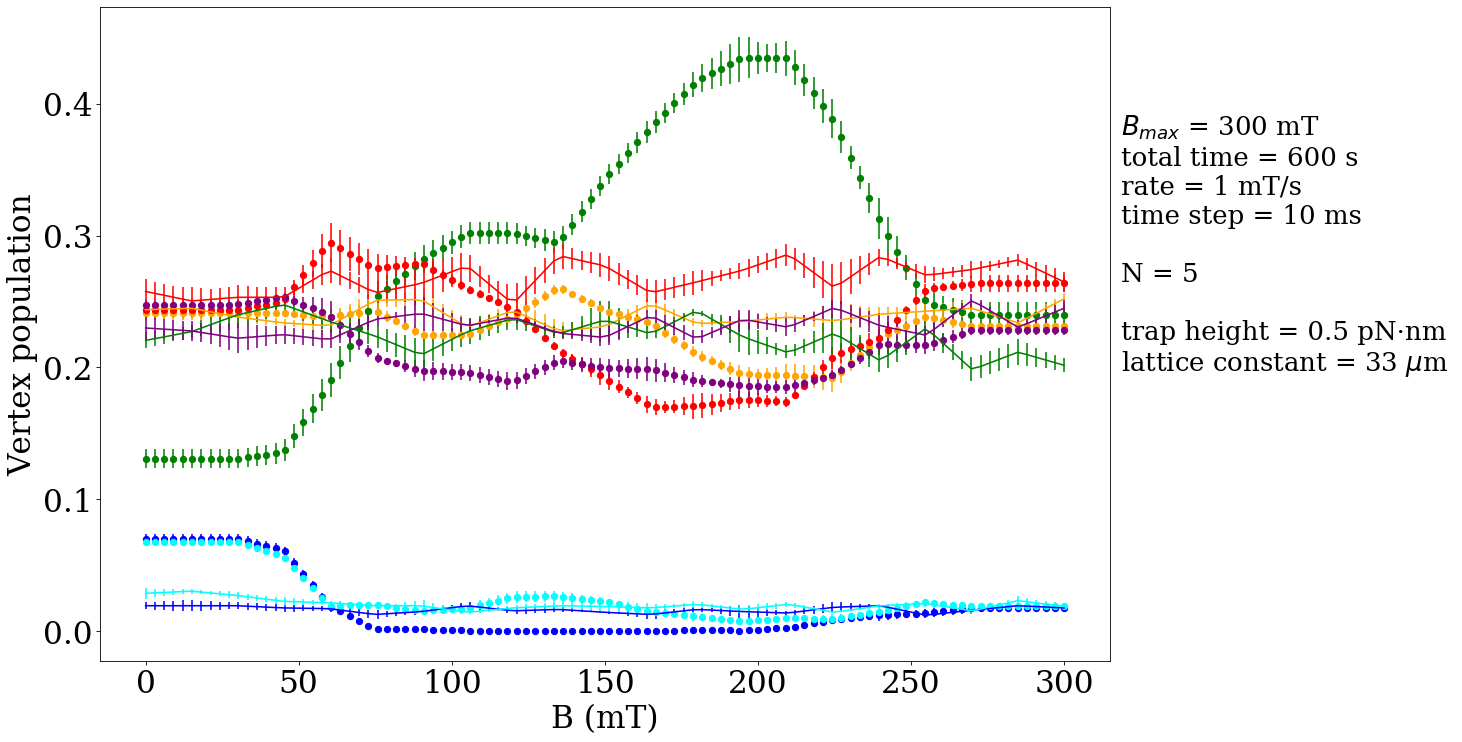

In [46]:
fig, ax1 = plt.subplots(figsize=(15,10))

for typ_m, mtype in v_counts_m.groupby("type"):
    print(typ_m)
    plt.errorbar(mtype.index.get_level_values("field"), mtype["mean"], yerr = mtype["err"],fmt = 'o', label = typ_m)
    
for typ, vtype in v_counts_b.groupby("type"):
    plt.errorbar(vtype.index.get_level_values("field"), vtype["mean"], yerr = vtype["err"],fmt = '-', label = typ)

ax1.tick_params(axis='y', labelsize=30)
ax1.tick_params(axis='x', labelsize=30)  

#ax1.legend(fontsize = 18)
ax1.set_xlabel('B (mT)', size = 30)
ax1.set_ylabel('Vertex population', size = 30)

plt.figtext(1,0.5,'$B_{max}$ = 300 mT \ntotal time = 600 s \nrate = 1 mT/s \ntime step = 10 ms \n \nN = 5 \n \ntrap height = 0.5 pN·nm \nlattice constant = 33 $\mu$m', size = 25)
plt.tight_layout()
#plt.savefig('BidisperseIce_hysteresis_loop', bbox_inches='tight')